In [16]:
!git clone https://github.com/rohitinu6/Stock-Price-Prediction.git


Cloning into 'Stock-Price-Prediction'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 48 (delta 16), reused 12 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (48/48), 434.02 KiB | 2.52 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [17]:
%cd Stock-Price-Prediction


/content/Stock-Price-Prediction/Stock-Price-Prediction


In [10]:
!ls


 code-of-conduct.md   Data	     README.md	 Stock_Price_Prediction.ipynb
 Contributing.md     'Python File'   SBIN.csv


In [5]:
!pwd



/content


In [12]:
!ls


 code-of-conduct.md   Data	     README.md	 Stock_Price_Prediction.ipynb
 Contributing.md     'Python File'   SBIN.csv


In [14]:
%cd Stock-Price-Prediction



[Errno 2] No such file or directory: 'Stock-Price-Prediction'
/content/Stock-Price-Prediction


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor  # Corrected import for DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [19]:

df = pd.read_csv('/content/Stock-Price-Prediction/SBIN.csv')

In [20]:
# Load the dataset
#df = pd.read_csv('/content/SBIN.NS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-01-1996,18.691147,18.978922,18.540184,18.823240,12.409931,43733533.0
1,02-01-1996,18.894005,18.964767,17.738192,18.224106,12.014931,56167280.0
2,03-01-1996,18.327892,18.568489,17.643839,17.738192,11.694577,68296318.0
3,04-01-1996,17.502312,17.832542,17.223972,17.676863,11.654142,86073880.0
4,05-01-1996,17.738192,17.785366,17.459852,17.577793,11.588827,76613039.0


In [21]:
# Drop the 'Date' and 'Adj Close' columns
df.drop(['Date', 'Adj Close'], axis=1, inplace=True)

In [22]:
df.head()

,Open,High,Low,Close,Volume
0,18.691147,18.978922,18.540184,18.823240,43733533.0
1,18.894005,18.964767,17.738192,18.224106,56167280.0
2,18.327892,18.568489,17.643839,17.738192,68296318.0
3,17.502312,17.832542,17.223972,17.676863,86073880.0
4,17.738192,17.785366,17.459852,17.577793,76613039.0


In [23]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [24]:
# Select features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train.shape

(5659, 4)

In [28]:
X_test.shape

(1415, 4)

In [29]:
y_train.shape

(5659,)

In [30]:
y_test.shape

(1415,)

In [31]:
# Function to evaluate and print RMSE, MAE, and MAPE
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"MAPE: {mape}\n")

    return rmse, mae, mape


In [32]:
metrics = {
    "Model": [],
    "RMSE": [],
    "MAE": [],
    "MAPE": []
}

## 1. LINEAR REGRESSION

In [33]:
# Create a linear regression model
model1 = LinearRegression()

In [34]:
y_train.head()

,Close
5286,257.350006
3408,129.464996
5477,279.350006
6906,588.500000
530,21.644367


In [35]:
# Train the model
model1.fit(X_train, y_train)

LinearRegression()

In [36]:
rmse, mae, mape = evaluate_model(model1, X_test_scaled, y_test)
metrics["Model"].append("Linear Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 234.77989480270563
MAE: 176.52560636631733
MAPE: 0.9999434459009082



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## 2. SVR

In [37]:
# Create an SVR model
model2 = SVR()

In [38]:
# Train the model
model2.fit(X_train, y_train)

SVR()

In [39]:
rmse, mae, mape = evaluate_model(model2, X_test_scaled, y_test)
metrics["Model"].append("SVR")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


RMSE: 155.09208188200955
MAE: 124.0643357754677
MAPE: 2.471521622294383



## 3. Random Forest

In [40]:
model3 = RandomForestRegressor()

In [41]:
# Train the model
model3.fit(X_train, y_train)

RandomForestRegressor()

In [42]:
rmse, mae, mape = evaluate_model(model3, X_test_scaled, y_test)
metrics["Model"].append("Random Forest")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.91059485704434
MAE: 162.96050630804314
MAPE: 0.7503071829574962



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## 4. Gradient Boosting Models (GBM)

In [43]:
model4 = GradientBoostingRegressor()

In [44]:
# Train the model
model4.fit(X_train, y_train)

GradientBoostingRegressor()

In [45]:
rmse, mae, mape = evaluate_model(model4, X_test_scaled, y_test)
metrics["Model"].append("GBM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.41069433522418
MAE: 162.27122816197573
MAPE: 0.7378541693598378



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


## 5. Extreme Gradient Boosting (XGBoost)

In [46]:
import xgboost as xgb
# Create an XGBoost model
model5 = xgb.XGBRegressor()

In [47]:
# Train the model
model5.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
rmse, mae, mape = evaluate_model(model5, X_test_scaled, y_test)
metrics["Model"].append("XGBoost")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.66436370022384
MAE: 162.62070643817412
MAPE: 0.7441437311249671



## 6. AdaBoostRegressor

In [49]:
model6 = AdaBoostRegressor()

In [50]:
# Train the model
model6.fit(X_train, y_train)

AdaBoostRegressor()

In [51]:
rmse, mae, mape = evaluate_model(model6, X_test_scaled, y_test)
metrics["Model"].append("AdaBoost Regressor")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 211.36161901329982
MAE: 149.9890662222131
MAPE: 0.7121386513977549



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


## 7. Decision Tree

In [52]:
model7 = DecisionTreeRegressor()

In [55]:
# Train the model
model7.fit(X_train, y_train)

DecisionTreeRegressor()

In [56]:
rmse, mae, mape = evaluate_model(model7, X_test_scaled, y_test)
metrics["Model"].append("Decision Tree")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 225.19713405326468
MAE: 163.35574713804317
MAPE: 0.7574890717636951



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


## 8. KNeighborsRegressor(KNN)

In [57]:
# Create a KNN model
model8 = KNeighborsRegressor()

In [58]:
# Train the model
model8.fit(X_train, y_train)

KNeighborsRegressor()

In [59]:
rmse, mae, mape = evaluate_model(model8, X_test_scaled, y_test)
metrics["Model"].append("KNN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

RMSE: 224.35603706259303
MAE: 162.1962430618594
MAPE: 0.7365233640314862



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


## 9. Artificial Neural Networks (ANN)

In [60]:
# Create an ANN model
model9 = Sequential()
model9.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model9.add(Dense(16, activation='relu'))
model9.add(Dense(1, activation='linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [61]:
# Compile the model
model9.compile(loss='mean_squared_error', optimizer='adam')

In [62]:
# Train the model
model9.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=0)

In [63]:
rmse, mae, mape = evaluate_model(model9, X_test_scaled, y_test)
metrics["Model"].append("ANN")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 2.7036599647041113
MAE: 1.7039873959709564
MAPE: 0.011998266947406744



## 10. LSTM(Long Short term Memory)

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [96]:
# Reshape the input data for LSTM
n_features = X_train_scaled.shape[1]
n_steps = 10
n_samples_train = X_train_scaled.shape[0] - n_steps + 1
n_samples_test = X_test_scaled.shape[0] - n_steps + 1

# Reshape the input data
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(n_samples_train)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(n_samples_test)])


In [98]:
# Create an LSTM model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [99]:
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


In [100]:
# Train the model
model.fit(X_train_reshaped, y_train[n_steps-1:], epochs=100, batch_size=32, verbose=0)

In [107]:
#Error correction :
# Assuming your X_test_scaled has 4 features
n_steps = 10  # Define your time steps

# Function to create sequences
def create_sequences(data, n_steps):
    X = []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
    return np.array(X)

# Reshape X_test_scaled
X_test_reshaped = create_sequences(X_test_scaled, n_steps)

# Now X_test_reshaped should be of shape (samples, 10, 4)
predictions = model.predict(X_test_reshaped)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [105]:
X_train_reshaped = create_sequences(X_train_scaled, n_steps)
y_train_reshaped = y_train[n_steps:]
X_test_reshaped = create_sequences(X_test_scaled, n_steps)
y_test_reshaped = y_test[n_steps:]

In [113]:
rmse, mae, mape = evaluate_model(model, X_test_scaled, y_test)
metrics["Model"].append("LSTM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

TypeError: evaluate_model() takes 2 positional arguments but 3 were given

In [114]:

#1
# Generate predictions
# Assuming your X_test_scaled has 4 features
n_steps = 10  # Define your time steps

# Function to create sequences
def create_sequences(data, n_steps):
    X = []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
    return np.array(X)

# Reshape X_test_scaled using the create_sequences function
X_test_reshaped = create_sequences(X_test_scaled, n_steps)

predictions = model.predict(X_test_reshaped) #Use the reshaped X_test_scaled

#Evaluate the model with the predictions and actual values
rmse, mae, mape = evaluate_model(predictions, y_test[n_steps:]) # Make sure to use the same number of steps for y_test

metrics["Model"].append("LSTM")
metrics["RMSE"].append(rmse)
metrics["MAE"].append(mae)
metrics["MAPE"].append(mape)

44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step


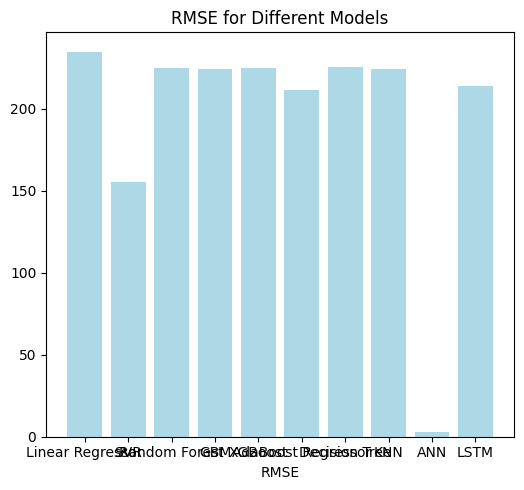

In [122]:
# Create a DataFrame for metrics
metrics_df = pd.DataFrame(metrics)

# Plot RMSE, MAE, and MAPE for each model
plt.figure(figsize=(15, 5))

# RMSE Plot
plt.subplot(1, 3, 1)
plt.bar(metrics_df['Model'], metrics_df['RMSE'], color='lightblue')
plt.xlabel('RMSE')
plt.title('RMSE for Different Models')
plt.tight_layout()
plt.show()

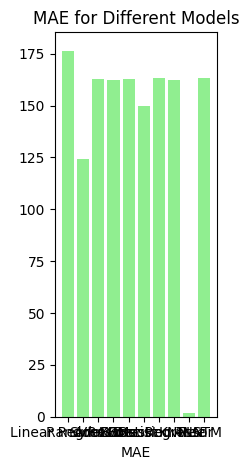

In [121]:
# MAE Plot
plt.subplot(1, 3, 2)
plt.bar(metrics_df['Model'], metrics_df['MAE'], color='lightgreen')
plt.xlabel('MAE')
plt.title('MAE for Different Models')
plt.tight_layout()
plt.show()

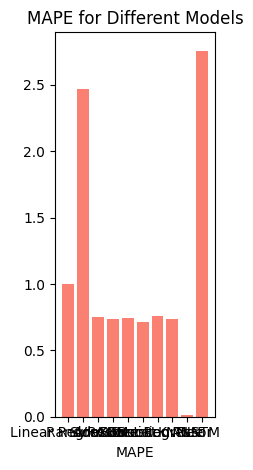

In [117]:
# MAPE Plot
plt.subplot(1, 3, 3)
plt.bar(metrics_df['Model'], metrics_df['MAPE'], color='salmon')
plt.xlabel('MAPE')
plt.title('MAPE for Different Models')
plt.tight_layout()
plt.show()

#Incorporate feature engineering for enhanced model performance
issue #16


In [118]:
def calculate_sma(data, window):
    """Calculate Simple Moving Average."""
    return data['Close'].rolling(window=window).mean()

def calculate_ema(data, window):
    """Calculate Exponential Moving Average."""
    return data['Close'].ewm(span=window, adjust=False).mean()

# Define the windows for SMA and EMA
sma_window = 14  # For example, 14-day SMA
ema_window = 14  # For example, 14-day EMA

# Calculate SMA and EMA
df['SMA'] = calculate_sma(df, sma_window)
df['EMA'] = calculate_ema(df, ema_window)

# Display the updated DataFrame
print(df[['Close', 'SMA', 'EMA']].tail())  # Check the last few rows


           Close         SMA         EMA
7069  642.950012  629.521432  633.617826
7070  650.250000  630.475002  635.835449
7071  675.250000  633.992859  641.090723
7072  699.549988  639.082145  648.885291
7073  725.250000  646.046430  659.067253


The stock is showing a closing price of 725.25, with both the SMA and EMA being lower, suggesting a potential upward trend

In [119]:
# Define features and target variable
features = df[['Open', 'High', 'Low', 'Close', 'SMA', 'EMA']].dropna()  # Drop rows with NaN values
target = df['Close'][features.index]  # Align the target variable

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [120]:
# Scale (as a precaution)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for LSTM (if applicable)
n_steps = 10  # Define your time steps
n_features = X_train_scaled.shape[1]

# Reshape the input data for LSTM
X_train_reshaped = np.array([X_train_scaled[i:i+n_steps, :] for i in range(X_train_scaled.shape[0] - n_steps)])
X_test_reshaped = np.array([X_test_scaled[i:i+n_steps, :] for i in range(X_test_scaled.shape[0] - n_steps)])

#Train the model again!!!
